##  Co2 Emission Estimates and GDP

# Data read & Preprocessing

## Import, Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
gdp = pd.read_csv('SYB63_230_202009_GDP and GDP Per Capita.csv')
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')

## Functions

### preprocessing() : 분석에 필요 없는 행과 열 제거

In [3]:
def preprocessing(df):
    df.columns =df.loc[0]
    df.rename(columns = {df.columns[1] : 'country'}, inplace = True)
    df = df.drop([0])
    df = df.drop(['Region/Country/Area','Footnotes','Source'],axis=1)
    return df

In [4]:
gdp = preprocessing(gdp)
co2 = preprocessing(co2)

### split_df() : Series 특성에 의한 데이터 분류 + 변수 할당 저장

In [5]:
def split_df(df,df_name):
    key = df['Series'].unique()
    key = list(key)
    print('변수 생성 개수',len(key))
    print('%s특성'%df_name,key)
    print()
    for i,v in enumerate(key):
        globals()['%s%d'%(df_name,i)] = df[df['Series']== v]
    
    return key
        
        
gdp_ = 'gdp_'
co2_ = 'co2_'
gdp_key = split_df(gdp,gdp_)
co2_key = split_df(co2,co2_)

변수 생성 개수 4
gdp_특성 ['GDP in current prices (millions of US dollars)', 'GDP per capita (US dollars)', 'GDP in constant 2010 prices (millions of US dollars)', 'GDP real rates of growth (percent)']

변수 생성 개수 2
co2_특성 ['Emissions (thousand metric tons of carbon dioxide)', 'Emissions per capita (metric tons of carbon dioxide)']



In [6]:
len(gdp_0),len(gdp_1),len(gdp_2),len(gdp_3),len(co2_0),len(co2_1)

(1662, 1662, 1662, 1658, 1066, 1066)

### data() : 년(공통적으로 존재하는)도 별로 분류

In [7]:
def data(dataframe):
    a = dataframe.loc[dataframe['Year']=='2005']
    b = dataframe.loc[dataframe['Year']=='2010']
    c = dataframe.loc[dataframe['Year']=='2015']
    d = dataframe.loc[dataframe['Year']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

a0,b0,c0,d0,gdp_0 = data(gdp_0) 
a1,b1,c1,d1,gdp_1 = data(gdp_1)
a2,b2,c2,d2,gdp_2 = data(gdp_2)
a3,b3,c3,d3,gdp_3 = data(gdp_3)
a00,b00,c00,d00,co2_0 = data(co2_0)
a11,b11,c11,d11,co2_1 = data(co2_1)
GDP = [a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
CO2 = [a00,b00,c00,d00,a11,b11,c11,d11]

### graph() : 년도 별 분류된 데이터 시각화

In [8]:
def graph(a,b,c,d,ss):
    s = 'country'
    x1 = a['%s'%s]
    y1 = a['Value']
    x2 = b['%s'%s]
    y2 = b['Value']
    x3 = c['%s'%s]
    y3 = c['Value']
    x4 = d['%s'%s]
    y4 = d['Value']
  
    plt.figure(figsize=(30,25))
    plt.subplots_adjust(hspace=1)
    plt.suptitle('%s'%ss,fontsize=40)
    ##
    plt.subplot(5,1,1)
    line1 = plt.plot(x1,y1,label='2005')
    plt.setp(line1, color='r', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%a['Series'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,2)
    line2 = plt.plot(x2,y2,label='2010')
    plt.setp(line2, color='g', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%b['Series'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,3)
    line3 = plt.plot(x3,y3,label='2015')
    plt.setp(line3, color='b', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%c['Series'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,4)
    line4 = plt.plot(x4,y4,label='2017')
    plt.setp(line4, color='y', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%d['Series'].iloc[0],fontsize=25)
    plt.legend(fontsize=20)
    ##
    plt.subplot(5,1,5)
    plt.plot(x1,y1,'r',label='2005')
    plt.plot(x2,y2,'g',label='2010')
    plt.plot(x3,y3,'b',label='2015')
    plt.plot(x4,y4,'y',label='2017')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Total',fontsize=25)
    plt.legend(fontsize=20)
    plt.show()

### country() : 각 데이터프레임의 국가(공통 되는)수를 맞추는 함수

In [9]:
def country(df1,df2): 
    country = []
    for i  in df1['country']:
        for j in df2['country']:
            if i==j:
                country.append(i)
                break
    return country  

### Standardization() 표준화 함수

In [10]:
def Standardization(df):
    df['Value'] = (df['Value'] - df['Value'].mean())/df['Value'].std()
    return df['Value']

### Normalization() 정규화 함수

In [11]:
def Normalization(df):
    df['Value'] = (df['Value'] - df['Value'].mean())/(df['Value'].max() - df['Value'].min())
    return df['Value']

### size_() : 총 데이터에서 최소공통 국가로 축소

In [12]:
def size_(sizing, df):
    return pd.merge(country,df,left_on='country',right_on='country')

### cos_sim() : 코사인 유사도를 구하는 함수

In [13]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

### similarity() : 데이터 프레임 2개사이의 유사도를 구하는 함수

=> 내부에서 코사인유사도 함수 호출

In [14]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='country',right_on='country')
    return cos_sim(result['Value_x'],result['Value_y'])

### obtain함수 : 결론 도출 함수
각 데이터 프레임마다 유사도를 구하고 분기별, 총합 유사도의 평균을 구한다

In [15]:
def obtain(ds1,ds2):
    sim_ = []
    info_ = []
    real_sim = []
    for i,v in enumerate(ds1):
        sim = []
        for j,k in enumerate(ds2):
                
            sim.append(similarity(v,k))
            sim_.append(similarity(v,k))
            info_.append([similarity(v,k),i,j])

            gdp_name = v['Series'].iloc[0]
            co2_name = k['Series'].iloc[0]
            gdp_year = v['Year'].iloc[0]
            co2_year = k['Year'].iloc[0]
            
            if gdp_year == co2_year:
                real_sim.append(similarity(v,k))
            print( '%s --V.S-- %s'%(gdp_name,co2_name))
            print(gdp_year,co2_year)
            print(similarity(v,k),i,j)
            print()
        ####################
        simil_mean = sum(sim)/len(sim)
        print('-'*100)
        print( '%s %s년 --V.S-- %s'%(gdp_name,gdp_year,co2_name))
        print('평균값==>>',simil_mean)
        print('-'*100,'\n')
        ####################
    simil_mean = sum(sim_)/len(sim_)
    print(simil_mean, 'co2와 internet usage 유사도 총합 평균')
    return sim_,info_,real_sim

### MaxSilmiarity : 결론 도출 함수

=> 최고 유사도를 갖는 조합을 구하고 시각화

In [16]:
def MaxSilmiarity(list1,list2,ds1,ds2):
    
    maxidx=0
    for i in range(len(sim_)): # 유사도가 제일 높은 데이터 조합 index찾기
        if max(sim_) == sim_[i]:
            print('최고 유사도 index',i)
            maxidx=i
    print('sim_[%d] == max(sim_)'%maxidx)
    print('해당 인덱스가 최고 유사도를 갖는지 확인 ',sim_[maxidx] == max(sim_))
    ##################################
    print(info_[maxidx])
    first = info_[maxidx][1]
    second = info_[maxidx][2]
    ##################################
    plt.figure(figsize=(15,15))
    plt.plot(ds1[first]['country'],ds1[first]['Value'],'r')
    plt.plot(ds2[second]['country'],ds2[second]['Value'],'b')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Max similarity',fontsize=25)
    plt.show()
    

## Programming

### 정규화 or 표준화

In [17]:
input_ = input("정규화: n 표준화:s ")
i=0
if input_ =='n':
    while True:
        if i <len(GDP):
            GDP[i]['Value'] = GDP[i]['Value'].apply(pd.to_numeric)
            GDP[i]['Value'] = Normalization(GDP[i])
        if i < len(CO2):
            CO2[i]['Value'] = CO2[i]['Value'].apply(pd.to_numeric)
            CO2[i]['Value'] = Normalization(CO2[i])
        if i >= len(GDP):
            break
        i+=1
        
elif input_ =='s':
    while True:
        if i <len(GDP):
            GDP[i]['Value'] = GDP[i]['Value'].apply(pd.to_numeric)
            GDP[i]['Value'] = Standardization(GDP[i])
        if i < len(CO2):
            CO2[i]['Value'] = CO2[i]['Value'].apply(pd.to_numeric)
            CO2[i]['Value'] = Standardization(CO2[i])
        if i >= len(GDP):
            break
        i+=1    
        
else:
    print('다시 입력하세요')

정규화: n 표준화:s s


### FOR 문을 통해서 각 데이터별 비교하여 동일한 나라 개수 확인

In [18]:
country_len = []
countries = []
idx = []
for i,v in enumerate(GDP):
    for j,k in enumerate(CO2):
        countries_ = country(v,k) #변수에 비교값 나라명 데이터 저장
        countries.append(country(v,k)) #배열에 나라명 데이터 저장 
        country_len.append(len(countries_)) #각 길이데이터를 저장
print(country_len,end=" ")

[138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 139, 139, 138, 138, 139, 139, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 138, 138, 138, 138, 138, 138, 138, 138, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141, 139, 139, 141, 141] 

### 최소 공통국가 개수와 동일한 수를 갖는 조합의 인덱스 추출

In [19]:
min_idx = []
for i in range(len(countries)):
    if min(country_len) == country_len[i]:
        min_idx.append(i)
print('최소 동일 개수',min(country_len))
print('최소 동일 개수를 같는 조합 인덱스 ',min_idx)

최소 동일 개수 138
최소 동일 개수를 같는 조합 인덱스  [0, 1, 4, 5, 32, 33, 36, 37, 64, 65, 68, 69, 96, 97, 98, 99, 100, 101, 102, 103]


###  최소 동일 개수를 갖는 순번의 배열마다 국가명 비교 

In [20]:
for i in range(len(min_idx)-1):
    if countries[min_idx[i]]==countries[min_idx[i+1]]:
        print(min_idx[i],min_idx[i+1],end=" , ")

0 1 , 1 4 , 4 5 , 5 32 , 32 33 , 33 36 , 36 37 , 37 64 , 64 65 , 65 68 , 68 69 , 69 96 , 96 97 , 97 98 , 98 99 , 99 100 , 100 101 , 101 102 , 102 103 , 

### 전체가 동일함을 확인후 하나의 데이터 선정 

In [21]:
print('해당 나라들을 기준으로 데이터 경량화 진행')
country = countries[0]
country = {'country':country}
country = pd.DataFrame(country)
country

해당 나라들을 기준으로 데이터 경량화 진행


,country
0,Albania
1,Algeria
2,Angola
3,Argentina
4,Armenia
...,...
133,Venezuela (Boliv. Rep. of)
134,Viet Nam
135,Yemen
136,Zambia


In [22]:
print('경량화 전',len(a0))

경량화 전 242


In [23]:
a0 = size_(country,a0)
b0 = size_(country,b0)
c0 = size_(country,c0)
d0 = size_(country,d0)
a1 = size_(country,a1)
b1 = size_(country,b1)
c1 = size_(country,c1)
d1 = size_(country,d1)
a2 = size_(country,a2)
b2 = size_(country,b2)
c2 = size_(country,c2)
d2 = size_(country,d2)
a3 = size_(country,a3)
b3 = size_(country,b3)
c3 = size_(country,c3)
d3 = size_(country,d3)

a00 = size_(country,a00)
b00 = size_(country,b00)
c00 = size_(country,c00)
d00 = size_(country,d00)
a11 = size_(country,a11)
b11 = size_(country,b11)
c11 = size_(country,c11)
d11 = size_(country,d11)

GDP = [a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
CO2 = [a00,b00,c00,d00,a11,b11,c11,d11]

In [24]:
print('경량화 후',len(a0))

경량화 후 138


# Visualization

## gdp 그래프

In [25]:
#graph(a0,b0,c0,d0,gdp_key[0]) 

In [26]:
#graph(a1,b1,c1,d1,gdp_key[1]) 

In [27]:
#graph(a2,b2,c2,d2,gdp_key[2])

In [28]:
#graph(a3,b3,c3,d3,gdp_key[3]) 

## Co2그래프

In [29]:
#graph(a00,b00,c00,d00,co2_key[0]) 

In [30]:
#graph(a11,b11,c11,d11,co2_key[1]) 

# 관계 분석

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2005
0.7488245529900913 0 0

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2010
0.623407806756159 0 1

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2015
0.5507128353719044 0 2

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2017
0.5345595346697368 0 3

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2005
0.24183415068468286 0 4

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2010
0.2333463077826825 0 5

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2015
0.2316325231951762 0 6

GDP in current

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2010
0.6555464960936216 6 5

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2015
0.5941569019884955 6 6

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2017
0.5941914225792843 6 7

----------------------------------------------------------------------------------------------------
GDP per capita (US dollars) 2015년 --V.S-- Emissions per capita (metric tons of carbon dioxide)
평균값==>> 0.3672870654690178
---------------------------------------------------------------------------------------------------- 

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2017 2005
0.14981706863615254 7 0

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2017 2010
0.10369820794869314 7 1

GDP per capita (US dollars) --V.S-- Emissions (thousand metri

0.02227624606362057 12 0

GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2010
0.06014002951512165 12 1

GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2015
0.0786330593980122 12 2

GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2017
0.08229497478124724 12 3

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2005
-0.03948000865713233 12 4

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2010
-0.035385104067766994 12 5

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2015
-0.00344460517040446 12 6

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2017
-0.007408425948971155 12 7

---------------------------------------------------

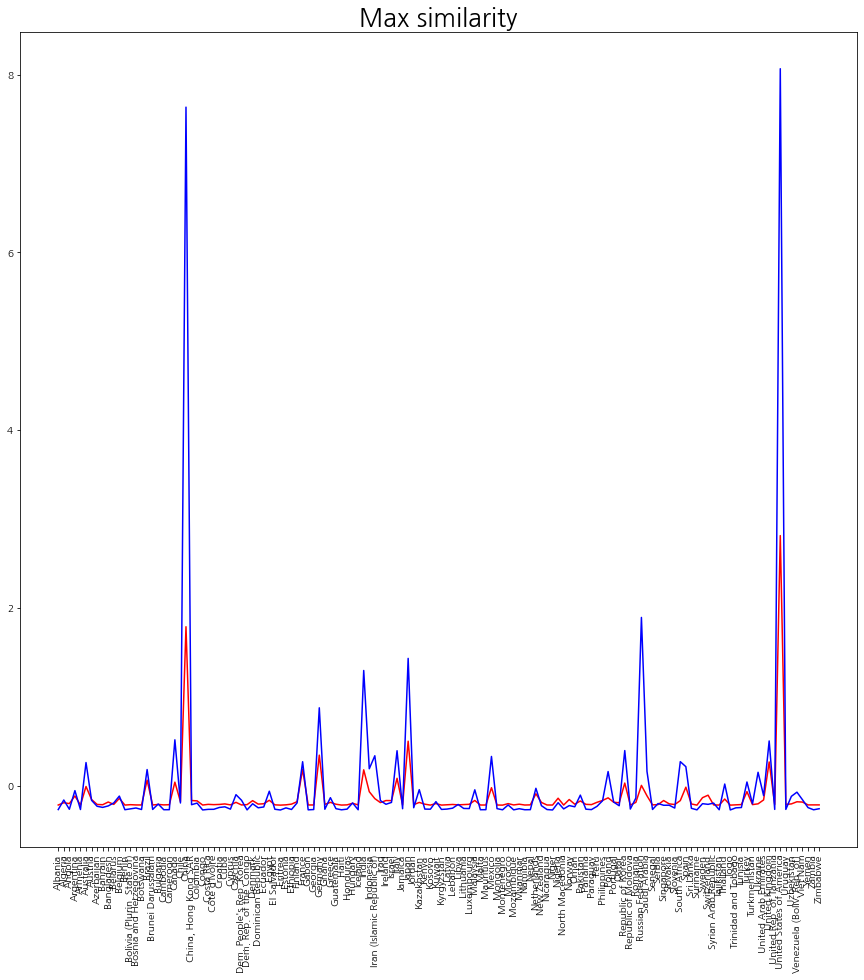

In [31]:
sim_,info_,real_ = obtain(GDP,CO2)
MaxSilmiarity(sim_,info_,GDP,CO2)

# 결과

## 같은 년도 별 유사도를 담은 real_ List

In [32]:
real_[:5]

[0.7488245529900913,
 0.24183415068468286,
 0.7315330058902695,
 0.22456441549779965,
 0.7818117168217382]

## 같은 년도 유사도분석 총합 평균

In [33]:
sum(real_)/len(real_)

0.33731259930759483

##  Co2 Emission Estimates and Internet

In [ ]:
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')
co2_1 = co2[co2['Unnamed: 3']=='Emissions (thousand metric tons of carbon dioxide)']
co2_2 = co2[co2['Unnamed: 3']=='Emissions per capita (metric tons of carbon dioxide)']
use = pd.read_csv('SYB63_314_202009_Internet Usage.csv')

In [ ]:
#2005,2010,2015,2017
#x에는 국가나라, y는 수치
def graph(a,b,c,d):
    
    s = a.columns[1]#'CO2 emission estimates'
    x1 = a['%s'%s]
    y1 = a['Unnamed: 4']
    x2 = b['%s'%s]
    y2 = b['Unnamed: 4']
    x3 = c['%s'%s]
    y3 = c['Unnamed: 4']
    x4 = d['%s'%s]
    y4 = d['Unnamed: 4']
  
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(x1,y1)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,2)
    plt.plot(x2,y2)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,3)
    plt.plot(x3,y3)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,4)
    plt.plot(x4,y4)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.show()


###  Standardization 표준화 함수

In [ ]:
def Standardization(df):
    df['Unnamed: 4'] = (df['Unnamed: 4'] - df['Unnamed: 4'].mean())/df['Unnamed: 4'].std()
    return df['Unnamed: 4']

### 데이터 분류

In [ ]:
def data(dataframe):
    dataframe.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
    a = dataframe.loc[dataframe['Unnamed: 2']=='2005']
    b = dataframe.loc[dataframe['Unnamed: 2']=='2010']
    c = dataframe.loc[dataframe['Unnamed: 2']=='2015']
    d = dataframe.loc[dataframe['Unnamed: 2']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

In [ ]:
a,b,c,d,co2_1 = data(co2_1)
a1,b1,c1,d1,co2_2 = data(co2_2)
e,f,g,h,use = data(use)

In [ ]:
CO2 = [a,b,c,d,a1,b1,c1,d1]
USE = [e,f,g,h]

for i in CO2:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)
for i in USE:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)

In [ ]:
print('Emissions (thousand metric tons of carbon dioxide)')
#graph(a,b,c,d) 

In [ ]:
print('Emissions per capita (metric tons of carbon dioxide)')
#graph(a1,b1,c1,d1)

In [ ]:
print('Internet Usage')
#graph(e,f,g,h)

#### 2005 2010 2015 2017 나라 인구별 이산화탄소 방출

In [ ]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
def country(df1,df2):
    country = []
    for i  in df1['%s'%df1.columns[1]]: 
        for j in df2['%s'%df2.columns[1]]: 
            if i==j:
                country.append(i)
                #country = {'country':country}
                #country = pd.DataFrame(country)
    return country  

In [ ]:
CO2 = [a,b,c,d,a1,b1,c1,d1]
USE = [e,f,g,h]

In [ ]:
country_len = []
countries = []
for i,v in enumerate(CO2):
    for j,k in enumerate(USE):
        countries_ = country(v,k) #변수에 비교값 나라명 데이터 저장
        countries.append(country(v,k)) #배열에 나라명 데이터 저장 
        country_len.append(len(countries_)) #각 길이데이터를 저장

In [ ]:
print(country_len,end=" ")

In [ ]:
min_idx = []
for i in range(len(countries)):
    if min(country_len) == country_len[i]:
        min_idx.append(i)
print('최소 동일 개수',min(country_len))
print('최소 동일 개수를 같는 조합 인덱스 ',min_idx)

In [ ]:
#len(countries),len(country_len)

In [ ]:
#최소동일개수(136)을 갖는 인덱스와 그에 해당하는 국가명이 같은지
for i in range(len(min_idx)-1):
    if countries[min_idx[i]]==countries[min_idx[i+1]]:
        print(min_idx[i],min_idx[i+1],end=" , ")

In [ ]:
print('해당 나라를 기준으로 데이터 경량화 진행')
country = countries[0] #최소공통국가 리스트중 아무거나 넣어도 성립하기 때문에 경량화 과정
country = {'country':country}
country = pd.DataFrame(country)
country

In [ ]:
def size_(sizing, df):  
    df_country = df.columns[1]#국가명
    size_col = sizing.columns[0]#country컬럼
    return pd.merge(sizing,df,left_on='%s'%size_col,right_on='%s'%df_country)

In [ ]:
print('경량화 전',len(a))

In [ ]:
a = size_(country,a)
b = size_(country,b)
c = size_(country,c)
d = size_(country,d)
a1 = size_(country,a1)
b1 = size_(country,b1)
c1 = size_(country,c1)
d1 = size_(country,d1)


e = size_(country,e)
f = size_(country,f)
g = size_(country,g)
h = size_(country,h)

In [ ]:
print('경량화 후',len(a))

## co2와 internet usage 비교 함수

In [ ]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='Internet Usage')
    return cos_sim(result['Unnamed: 4_x'],result['Unnamed: 4_y'])

## co2 특성 내에서 비교함수

In [ ]:
def a_similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='CO2 emission estimates')
    #result = result.drop('Internet Usage',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

In [ ]:
CO2 = [a,b,c,d,a1,b1,c1,d1]
USE = [e,f,g,h]

### co2 특성 내 유사도

In [ ]:
mean_ = []
for i,v in enumerate(CO2_1):
    for j,k in enumerate(CO2_2):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['CO2 emission estimates','Unnamed: 4']]
        print(a_similarity(v,k),i,j)
        mean_.append(a_similarity(v,k))
simil_mean = sum(mean_)/len(mean_)
print(simil_mean,'co2 특성 내 유사도 평균')

## co2와 internet usage 유사도

In [ ]:
mean_ = []
for i,v in enumerate(CO2):#참조해서 코드구현
    for j,k in enumerate(USE):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['Internet Usage','Unnamed: 4']]
        print(similarity(v,k),i,j)
        mean_.append(similarity(v,k))
simil_mean = sum(mean_)/len(mean_)#전체평균
print(simil_mean, 'co2와 internet usage 유사도 평균')